# Retinanet Object Detection

## 设置数据集

请将数据集压缩包上传到Image文件夹下，上传完成后执行下面的代码解压文件。
确保解压后的Image目录下的结构如下：

|Image

|—VOCdevkit

|——VOC

|————Annotations

        └─  *.xml # 存放图片的类别与边框

|————JPEGImages

        └─ *.jpg # 存放图片

|————ImageSets

|——————Main

            └─ *.txt # 存放训练集、验证集所用图片名称，包括train.txt,val.txt其中包含了图片的文件名

### ❗ 下面的单元格需要修改 ❗

In [1]:
import os
os.chdir('Image')
#!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
#!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
#请将模型压缩文件改为实际文件名
!tar xf VOCtrainval_06-Nov-2007.tar

In [2]:
!ls

VOC2007_train.txt  VOC2007_val.txt  VOCdevkit  VOCtrainval_06-Nov-2007.tar


## 设置数据集参数

### ❗ 下面2个单元格需要修改 ❗

In [3]:
#请修改文件夹名称
imagefolder = 'VOC2007'
os.chdir('VOCdevkit/' + imagefolder)

In [21]:
#请修改类别名称
labels_to_names = {0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow', 10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person', 15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}

## 标签格式转换
将VOC格式标签转换为CSV格式

In [4]:
# -*- coding:utf-8 -*-

import csv
import os
import glob
import sys

class PascalVOC2CSV(object):
    def __init__(self,xml=[], ann_path='./annotations.csv',classes_path='./classes.csv'):
        '''
        :param xml: 所有Pascal VOC的xml文件路径组成的列表
        :param ann_path: ann_path
        :param classes_path: classes_path
        '''
        self.xml = xml
        self.ann_path = ann_path
        self.classes_path=classes_path
        self.label=[]
        self.annotations=[]

        self.data_transfer()
        self.write_file()


    def data_transfer(self):
        for num, xml_file in enumerate(self.xml):
            try:
                # print(xml_file)
                # 进度输出
                sys.stdout.write('\r>> Converting image %d/%d' % (
                    num + 1, len(self.xml)))
                sys.stdout.flush()

                with open(xml_file, 'r') as fp:
                    for p in fp:
                        if '<filename>' in p:
                            self.filen_ame = p.split('>')[1].split('<')[0]

                        if '<object>' in p:
                            # 类别
                            d = [next(fp).split('>')[1].split('<')[0] for _ in range(9)]
                            self.supercategory = d[0]
                            if self.supercategory not in self.label:
                                self.label.append(self.supercategory)

                            # 边界框
                            x1 = int(d[-4]);
                            y1 = int(d[-3]);
                            x2 = int(d[-2]);
                            y2 = int(d[-1])

                            self.annotations.append([os.path.join('JPEGImages',self.filen_ame),x1,y1,x2,y2,self.supercategory])
            except:
                continue

        sys.stdout.write('\n')
        sys.stdout.flush()

    def write_file(self,):
        with open(self.ann_path, 'w', newline='') as fp:
            csv_writer = csv.writer(fp, dialect='excel')
            csv_writer.writerows(self.annotations)

        class_name=sorted(self.label)
        class_=[]
        for num,name in enumerate(class_name):
            class_.append([name,num])
        with open(self.classes_path, 'w', newline='') as fp:
            csv_writer = csv.writer(fp, dialect='excel')
            csv_writer.writerows(class_)

In [5]:
with open('ImageSets/Main/train.txt', 'r') as f:
    trainxml = ['Annotations/' + item[:-1] + '.xml' for item in f.readlines()]
with open('ImageSets/Main/val.txt', 'r') as f:
    valxml = ['Annotations/' + item[:-1] + '.xml' for item in f.readlines()]

PascalVOC2CSV(trainxml,ann_path='./annotations_train.csv')
PascalVOC2CSV(valxml,ann_path='./annotations_val.csv')

>> Converting image 2501/2501
>> Converting image 2510/2510


如果有测试集对于的txt文件，请取消注释下面的命令

In [1]:
#with open('ImageSets/Main/test.txt', 'r') as f:
#    valxml = ['Annotations/' + item[:-1] + '.xml' for item in f.readlines()]

#PascalVOC2CSV(trainxml,ann_path='./annotations_test.csv')

In [6]:
!ls

Annotations	       annotations_val.csv  JPEGImages	SegmentationClass
annotations.csv        classes.csv	    labels	SegmentationObject
annotations_train.csv  ImageSets	    logs	snapshots


### 更新 keras至2.2.0版本

In [19]:
!import sys
!{sys.executable} -m pip install --upgrade keras

import: unable to open X server `' @ error/import.c/ImportImageCommand/364.
  Using cached https://files.pythonhosted.org/packages/68/12/4cabc5c01451eb3b413d19ea151f36e33026fc0efb932bf51bcaf54acbf5/Keras-2.2.0-py2.py3-none-any.whl
Requirement already up-to-date: pyyaml in /anaconda/envs/py35/lib/python3.5/site-packages (from keras)
Requirement already up-to-date: keras-applications==1.0.2 in /anaconda/envs/py35/lib/python3.5/site-packages (from keras)
Requirement already up-to-date: scipy>=0.14 in /anaconda/envs/py35/lib/python3.5/site-packages (from keras)
Requirement already up-to-date: numpy>=1.9.1 in /anaconda/envs/py35/lib/python3.5/site-packages (from keras)
Requirement already up-to-date: six>=1.9.0 in /anaconda/envs/py35/lib/python3.5/site-packages (from keras)
  Using cached https://files.pythonhosted.org/packages/f8/33/275506afe1d96b221f66f95adba94d1b73f6b6087cfb6132a5655b6fe338/Keras_Preprocessing-1.0.1-py2.py3-none-any.whl
Requirement already up-to-date: h5py in /anaconda/e

## 开始训练

### ❗ 下面的单元格需要修改 ❗

请根据数据集情况设置epoch和steps值，epoch为训练轮数，steps为每一轮训练使用的样本数

In [7]:
!retinanet-train --epoch=1 --steps=2500 csv ./annotations_train.csv ./classes.csv --val-annotations=./annotations_val.csv

Using TensorFlow backend.
2018-07-13 08:00:48.235763: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-07-13 08:00:52.674406: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1212] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 1e6d:00:00.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-07-13 08:00:52.674454: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1312] Adding visible gpu devices: 0
2018-07-13 08:01:07.144318: I tensorflow/core/common_runtime/gpu/gpu_device.cc:993] Creating TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10765 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 1e6d:00:00.0, compute capability: 3.7)
Creating model, this may take a second...
__________________________________________________________________________________________________
Layer (type)          

res4f_branch2a (Conv2D)         (None, None, None, 2 262144      res4e_relu[0][0]                 
__________________________________________________________________________________________________
bn4f_branch2a (BatchNormalizati (None, None, None, 2 1024        res4f_branch2a[0][0]             
__________________________________________________________________________________________________
res4f_branch2a_relu (Activation (None, None, None, 2 0           bn4f_branch2a[0][0]              
__________________________________________________________________________________________________
padding4f_branch2b (ZeroPadding (None, None, None, 2 0           res4f_branch2a_relu[0][0]        
__________________________________________________________________________________________________
res4f_branch2b (Conv2D)         (None, None, None, 2 589824      padding4f_branch2b[0][0]         
__________________________________________________________________________________________________
bn4f_branc

/anaconda/envs/py35/lib/python3.5/site-packages/keras/callbacks.py:999: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '
Epoch 1/1
2500/2500 [==============================] - 2725s 1s/step - loss: 3.1503 - regression_loss: 2.3027 - classification_loss: 0.8476
175 instances of class aeroplane with average precision: 0.0129
216 instances of class bicycle with average precision: 0.0137
305 instances of class bird with average precision: 0.0090
190 instances of class boat with average precision: 0.0015
294 instances of class bottle with average precision: 0.0001
141 instances of class bus with average precision: 0.0104
810 instances of class car with average precision: 0.0898
198 instances of class cat with average precision: 0.0435
703 instances of class chair with average precision: 0.0084
171 instances of class cow with average precision: 0.0089
161 instances of class diningtable with ave

## 测试

模型转换,训练产生的模型需要转换才能用于测试。

列出模型，模型尾数表示训练轮数，可依据训练产生的日志挑选最佳模型。

In [26]:
!ls snapshots -lh

total 2.1G
-rw-rw-r-- 1 jxm jxm 421M Jul 12 19:53 resnet50_csv_01.h5
-rw-rw-r-- 1 jxm jxm 421M Jul 12 21:34 resnet50_csv_02.h5
-rw-rw-r-- 1 jxm jxm 421M Jul 12 23:16 resnet50_csv_03.h5
-rw-rw-r-- 1 jxm jxm 421M Jul 13 00:57 resnet50_csv_04.h5
-rw-rw-r-- 1 jxm jxm 421M Jul 13 02:39 resnet50_csv_05.h5


### ❗ 下面的单元格需要修改 ❗

请将下面命令的参数`snapshots/resnet50_csv_05.h5`改为实际选择的模型文件

In [27]:
!retinanet-convert-model snapshots/resnet50_csv_05.h5 snapshots/val_model.h5

Using TensorFlow backend.
2018-07-13 02:51:33.291343: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-07-13 02:51:37.493699: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1212] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 094a:00:00.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-07-13 02:51:37.493747: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1312] Adding visible gpu devices: 0
2018-07-13 02:51:37.733199: I tensorflow/core/common_runtime/gpu/gpu_device.cc:993] Creating TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10765 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 094a:00:00.0, compute capability: 3.7)


在测试集上验证模型

### ❗ 下面的单元格需要修改 ❗

请将`annotations.csv`改为实际测试集对于的标签

In [28]:
!retinanet-evaluate csv annotations.csv classes.csv snapshots/val_model.h5

Using TensorFlow backend.
2018-07-13 02:59:11.723824: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-07-13 02:59:16.152498: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1212] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 094a:00:00.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-07-13 02:59:16.152546: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1312] Adding visible gpu devices: 0
2018-07-13 02:59:16.394185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:993] Creating TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10765 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 094a:00:00.0, compute capability: 3.7)
Loading model, this may take a second...
/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found i

## 单张图片测试

In [29]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


In [30]:
model_path = 'snapshots/val_model.h5'

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.load_model(model_path, backbone_name='resnet50', convert_model=True)

/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### ❗ 下面的单元格需要修改 ❗

In [2]:
#请改为实际测试的图片路径
imagepath = 'JPEGImages/000220.jpg'

processing time:  0.3917667865753174


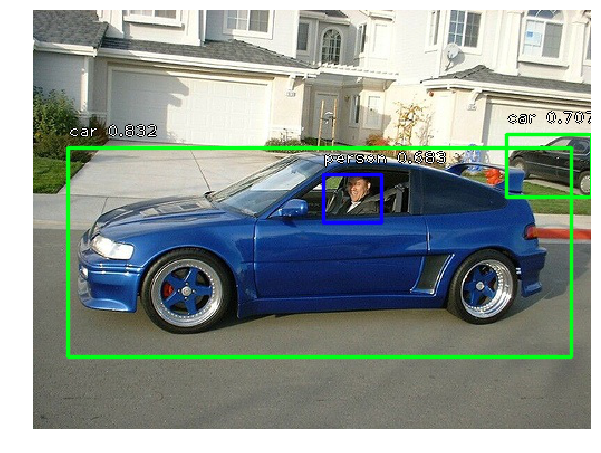

In [35]:
# load image
image = read_image_bgr(imagepath)

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(draw)
plt.show()

## 训练可选参数

!retinanet-train --epoch=50 --steps=250 --batch-size=4 --backbone=resnet50 csv ./annotations.csv ./classes.csv --val-annotations=./annotations.csv

- epocho 表示训练轮数，通常在一定范围内增大训练轮数能够提高模型的准确率

- steps 表示一轮训练使用的样本数目，可设定为训练样本总数

- batch-size 每一个batch的大小，如果显存足够，可以适当增加这个值加快模型训练进程,默认为1

- backbone 选择网络结构，默认是resnet50,可选`resnet50`，`resnet101`，`resnet152`，`mobilenet128_1.0`，`mobilenet128_0.75`，`mobilenet160_1.0`等


### 移动模型文件到retinanetweights文件夹中供下载

### ❗ 下面2个单元格需要修改 ❗

请将下面命令中的**VOC2007**修改为实际用到的训练集文件夹名称

In [18]:
!mkdir /home/msft/msfthack/Image/VOCdevkit/VOC2007/retinanetweights

In [19]:
!mv /home/msft/msfthack/Image/VOCdevkit/VOC2007/snapshots/* /home/msft/msfthack/Image/VOCdevkit/VOC2007/retinanetweights/